In [10]:
import numpy as np, matplotlib.pyplot as plt, json

# Analysis of the path length

We compiled the length of all the real UAVs path.

We can compare them to the actual ground truth shortest path. This ground truth is computed using an A* with a very fine resolution.

In [57]:
lengths = np.load('length6.npy')
best = np.load('bestLength.npy')
colors = ['#009be3', '#7195f1', '#b689ec', '#ed7ad4', '#ff6ead', '#ff727d', '#ff894a', '#ffa600', 'g', 'grey']

(3.6, 30.2173616027135)

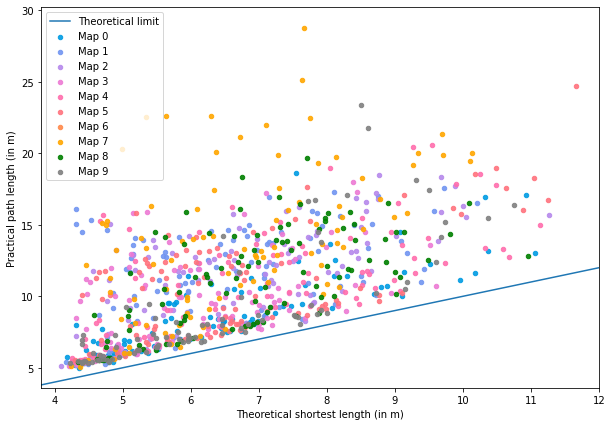

In [132]:
plt.figure(figsize=(10,7))
for i in range(10):
    b, l = [], []
    for j in range(100):
        if lengths[i*100 + j] != 0.:
            b.append(best[i*100 + j])
            l.append(lengths[i*100 + j])
    plt.scatter(b, l, color=colors[i], s=20, label="Map {}".format(i), alpha=.9, )
plt.plot([0,15], [0,15], label="Theoretical limit")
plt.xlabel('Theoretical shortest length (in m)')
plt.ylabel('Practical path length (in m)')
plt.legend()
plt.xlim(3.8, 12)
plt.ylim(bottom=3.6)

<ipython-input-153-dc71addf3ffe>:2: RuntimeWarning: invalid value encountered in true_divide
  p = (lengths - best) * 100 / best


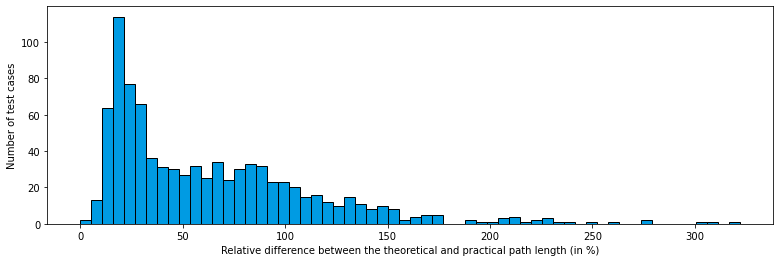

In [153]:
plt.figure(figsize=(13, 4))
p = (lengths - best) * 100 / best
p = np.array([e for e in p if e > 0])
p[:2] = 0
plt.hist(p, 60, color="#009be3", edgecolor="black")
plt.xlabel('Relative difference between the theoretical and practical path length (in %)')
plt.ylabel('Number of test cases')
plt.savefig('lengths.png', bbox_inches='tight')

63.78390291652175 50.07901696207536


(array([373., 172., 166.,  90.,  45.,  13.,  13.,   5.,   3.,   3.]),
 array([  6.11696999,  37.70420541,  69.29144084, 100.87867627,
        132.46591169, 164.05314712, 195.64038255, 227.22761798,
        258.8148534 , 290.40208883, 321.98932426]),
 <BarContainer object of 10 artists>)

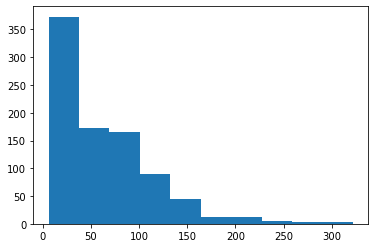

In [150]:
print(p.mean(), np.median(p))
plt.hist(p)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2ff14e880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2fe185a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2ff14ed60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2fe73c6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2fe73c310>],
 'means': []}

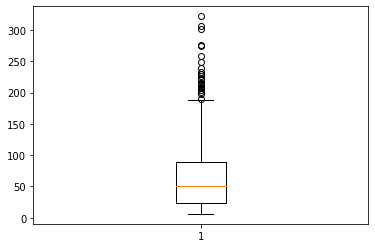

In [152]:
plt.boxplot(p)